In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

train_path = "../data/processed/train_model_prep.csv"
test_path = "../data/processed/test_model_prep.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train:", train_df.shape, "Test:", test_df.shape)
train_df.head()

Train: (57567, 10) Test: (14392, 10)


,Age,GenderNum,LeadTime,SMS_received,AppointmentWeekday_Monday,AppointmentWeekday_Saturday,AppointmentWeekday_Thursday,AppointmentWeekday_Tuesday,AppointmentWeekday_Wednesday,NoShow
0,9.0,0,16,0,False,False,True,False,False,1
1,42.0,0,5,1,True,False,False,False,False,0
2,34.0,0,3,1,False,False,False,True,False,0
3,15.0,0,12,1,False,False,False,True,False,1
4,57.0,0,17,0,False,False,False,True,False,1


In [2]:
feature_cols = [c for c in train_df.columns if c != "NoShow"]

x_train = train_df[feature_cols]
y_train = train_df["NoShow"]

x_test = test_df[feature_cols]
y_test = test_df["NoShow"]

In [13]:
model = LogisticRegression(max_iter = 500, class_weight = 'balanced')
model.fit(x_train, y_train)

print("Model trained!")

#print("Did it converge?", model.n_iter_)

Model trained!


Accuracy: 0.5528071150639244
Confusion Matrix:
 [[5644 4644]
 [1792 2312]]
              precision    recall  f1-score   support

           0       0.76      0.55      0.64     10288
           1       0.33      0.56      0.42      4104

    accuracy                           0.55     14392
   macro avg       0.55      0.56      0.53     14392
weighted avg       0.64      0.55      0.57     14392

ROC-AUC: 0.5764011218619167


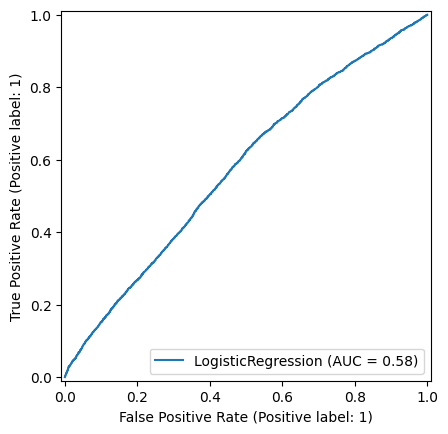

In [14]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [15]:
coef_df = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df.head(10))

                        Feature  Coefficient
3                  SMS_received    -0.175471
8  AppointmentWeekday_Wednesday    -0.074836
6   AppointmentWeekday_Thursday    -0.071882
1                     GenderNum    -0.048956
4     AppointmentWeekday_Monday     0.048887
7    AppointmentWeekday_Tuesday     0.025551
2                      LeadTime     0.011024
0                           Age    -0.010222
5   AppointmentWeekday_Saturday     0.008623


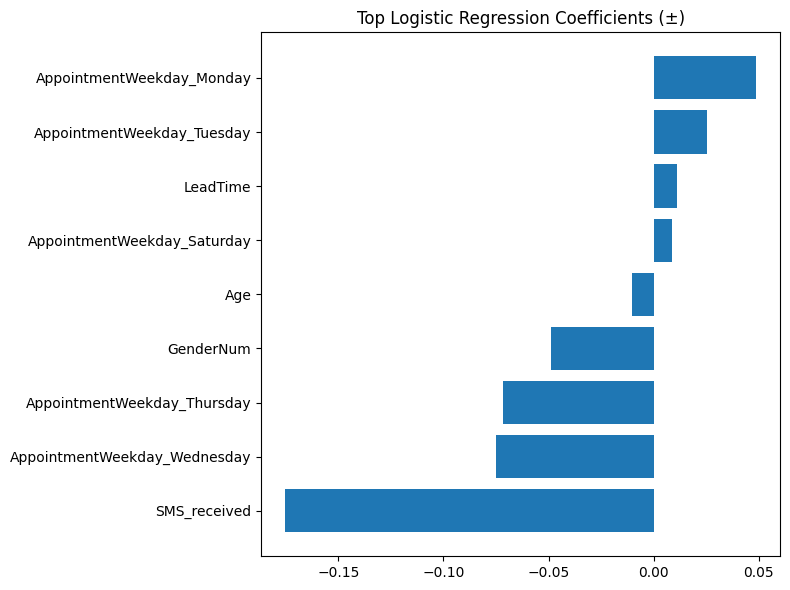

In [16]:
import os, matplotlib.pyplot as plt

os.makedirs("../assets", exist_ok=True)
os.makedirs("../data/processed", exist_ok=True)

coef_df.to_csv("../data/processed/logreg_coefficients.csv", index=False)

topn = 15
top_df = coef_df.head(topn).sort_values("Coefficient") # 음수-> 양수 순서로 바꿈
plt.figure(figsize=(8,6))
plt.barh(top_df["Feature"], top_df["Coefficient"])
plt.title("Top Logistic Regression Coefficients (±)")
plt.tight_layout()
plt.savefig("../assets/logreg_coefficients_top15.png", dpi=150)
plt.show()